# BOSTON HOUSE PRICE PRED
using linear reg and XGboost<br>
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [7]:
#importing data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# df=pd.read_csv('housing.csv',names=column_names)
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# data info

#print(df)
# df.columns
# df.describe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 
EDA

In [9]:
# sns.pairplot(df)

<Axes: >

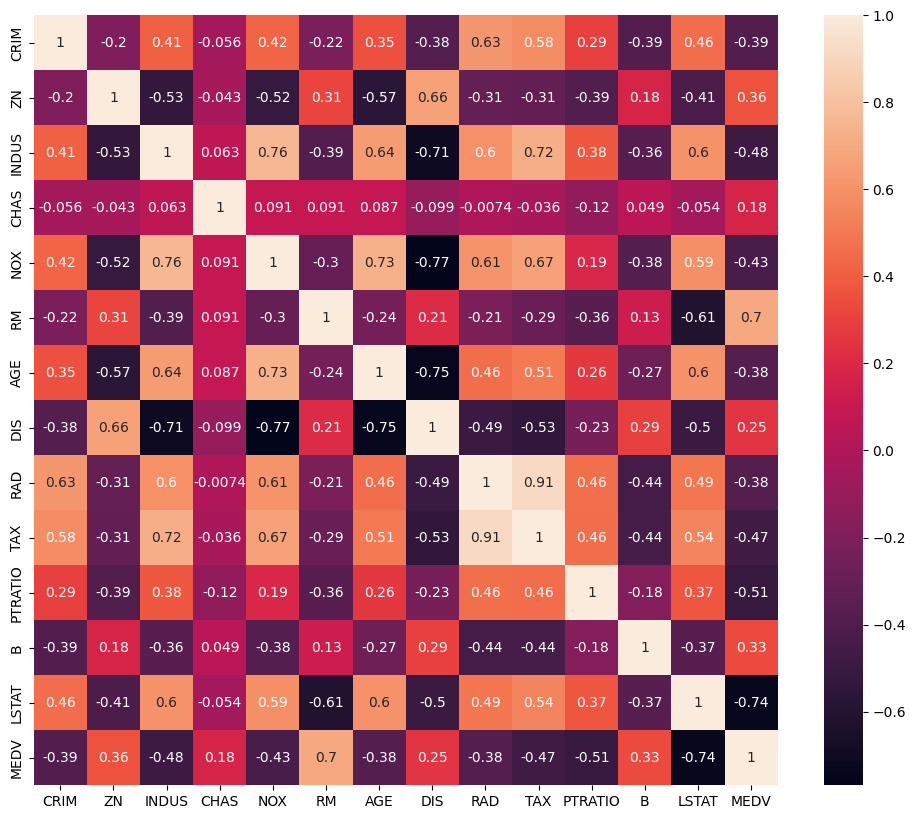

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

##
Train_Test_Split (using scikit-learn)

In [11]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']


In [13]:
from sklearn.model_selection import train_test_split as t_t_s

In [14]:
X_train,X_test,y_train,y_test=t_t_s(X,y,test_size=0.2,random_state=101)

In [15]:
#creating linear reg model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [16]:
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
#evaluate
lm.coef_

array([-9.89913563e-02,  4.25047578e-02,  1.67390094e-02,  3.06437882e+00,
       -1.56462528e+01,  4.01888422e+00, -8.31558474e-04, -1.44628034e+00,
        2.67827281e-01, -1.04725485e-02, -8.88651815e-01,  8.25262805e-03,
       -5.49367192e-01])

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [30]:
cdf = pd.DataFrame({'coeff': lm.coef_}, index=X.columns)
cdf

,coeff
CRIM,-0.098991
ZN,0.042505
INDUS,0.016739
CHAS,3.064379
NOX,-15.646253
RM,4.018884
AGE,-0.000832
DIS,-1.446280
RAD,0.267827
TAX,-0.010473


In [ ]:
#prediction 
prediction=lm.predict(X_test)
prediction


array([5436159.94000634, 6233444.3714254 , 4911599.45208537,
       4861754.50047535, 4681154.2080682 , 3434017.29266906,
       7288489.21784879, 3233480.04450302, 4997831.16254366,
       5841609.43432673, 4698140.8018478 , 7427603.58334508,
       4187047.94679699, 4509115.61115543, 6311186.04320427,
       5779605.82815167, 5553242.45783284, 6897528.52769176,
       2513533.75108462, 3508935.63571283, 4869816.87370263,
       4553154.21572975, 6133031.81393283, 5747597.71857447,
       3754893.86356908, 4176146.36865187, 2573656.04499491,
       4143260.37545195, 3410296.05577008, 4836301.91519221,
       6467495.81791663, 3007880.86498169, 6741927.11554908,
       2539415.89124121, 6295242.04593123, 2808654.62952227,
       4837671.15458912, 7593578.20769611, 3792317.064608  ,
       2502898.76447425, 4599541.64057178, 6536268.90056906,
       5081436.22916241, 5883150.59286031, 3227413.18624916,
       2668000.66602244, 5444728.46745417, 4125495.5053912 ,
       6836260.88136854,

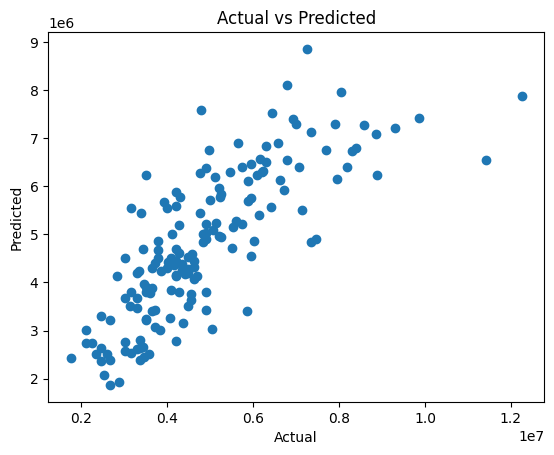

In [206]:

plt.scatter(y_test, prediction)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


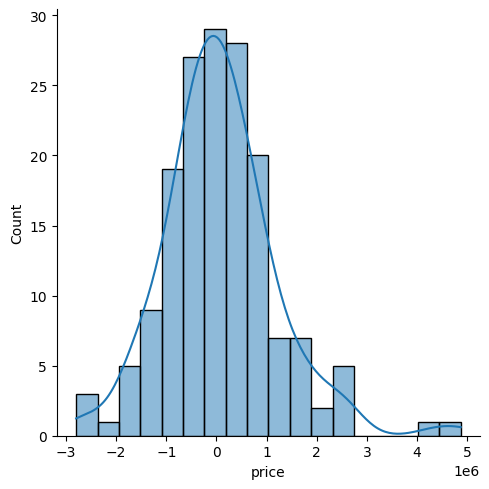

In [207]:
sns.displot((y_test-prediction),kde=True)

In [208]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)


817762.9532012205

In [209]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

np.float64(1124458.1650951805)